## Figure 3.B
### Comparison of Dorado Ψ reported modification occupancy before subtracting IVT false positive rate and reported modification occupancy after subtracting IVT.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [6]:
modkit_df = pd.read_csv('08_07_24_R9RNA_GM12878_mRNA_RT_sup_8mods_polyA_sorted_filtered.chr12-112000000-114000000_modkit_ivt_correct.tsv', sep='\t')

modkit_df.columns = [
    "chrom", "start_position", "end_position", "modified_base_code", "score", 
    "strand", "start_position_compat", "end_position_compat", "color", 
    "Nvalid_cov", "fraction_modified", "Nmod", "Ncanonical", "Nother_mod", 
    "Ndelete", "Nfail", "Ndiff", "Nnocall", "ivt_correct"
]

modkit_df = modkit_df[modkit_df['modified_base_code'].astype(str) == "17802"]

modkit_df = modkit_df[(modkit_df['fraction_modified'] > 0) & (modkit_df['score'] >= 20) & (modkit_df['ivt_correct'] > 0)]

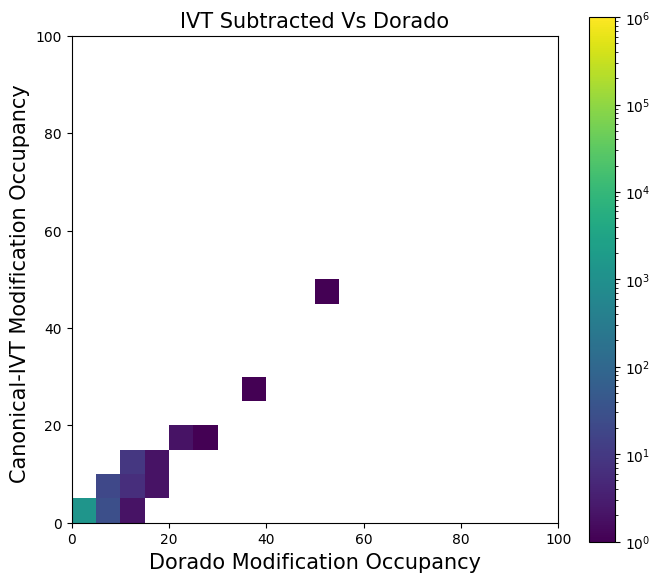

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)

cmap = mpl.cm.viridis
cmap.set_bad('white', 1.)

bandwidth_2d = 5
bins = np.arange(0, 100 + bandwidth_2d, bandwidth_2d)

hist = ax.hist2d(
    modkit_df['fraction_modified'],
    modkit_df['ivt_correct'], 
    bins=[bins, bins], 
    norm=mpl.colors.LogNorm(vmin=1, vmax=1e6),
    cmap=cmap
)

ax.set_xlabel('Dorado Modification Occupancy', fontsize=15)
ax.set_ylabel('Canonical-IVT Modification Occupancy ', fontsize=15)
ax.set_title('IVT Subtracted Vs Dorado', fontsize=15)

cbar = fig.colorbar(hist[3], ax=ax)
#cbar.set_label("Counts (log scale)", fontsize=12)

ax.set_xlim(0.0, 100)
ax.set_ylim(0.0, 100)
ax.set_aspect('equal')

ax.tick_params(axis='both')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    
fig.tight_layout()
plt.show()